In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df15 = pd.read_excel('Fires_100.xlsx', sheet_name='2015', na_values=['<Null>'],
                     converters={'ALARM_DATE_Con': pd.to_datetime, 'CONT_DATE_Conv': pd.to_datetime})
df16 = pd.read_excel('Fires_100.xlsx', sheet_name='2016', na_values=['<Null>'],
                     converters={'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})
df17 = pd.read_excel('Fires_100.xlsx', sheet_name='2017', na_values=['<Null>'],
                     converters={'ALARM_DATE': pd.to_datetime, 'CONT_DATE': pd.to_datetime})


In [44]:
print(df15.columns)
print(df16.columns)
print(df17.columns)

Index(['YEAR', 'STATE', 'UNIT_ID', 'FIRE_NUM', 'FIRE_NAME', 'AGENCY',
       'C_METHOD', 'CAUSE', 'INC_NUM', 'OBJECTIVE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'Shape_Length', 'Shape_Area', 'ALARM_DATE_Con',
       'CONT_DATE_Conv'],
      dtype='object')
Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')
Index(['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')


In [45]:
df15.rename(columns={'ALARM_DATE_Con':'ALARM_DATE','CONT_DATE_Conv':'CONT_DATE'}, inplace=True)
df17.rename(columns={'YEAR_': 'YEAR'}, inplace=True)
print(df15.columns)
print(df16.columns)
print(df17.columns)

Index(['YEAR', 'STATE', 'UNIT_ID', 'FIRE_NUM', 'FIRE_NAME', 'AGENCY',
       'C_METHOD', 'CAUSE', 'INC_NUM', 'OBJECTIVE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'Shape_Length', 'Shape_Area', 'ALARM_DATE', 'CONT_DATE'],
      dtype='object')
Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')
Index(['YEAR', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM',
       'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'REPORT_AC',
       'GIS_ACRES', 'C_METHOD', 'OBJECTIVE'],
      dtype='object')


In [46]:
df15 = df15.drop(columns=['Shape_Length', 'Shape_Area', 'FIRE_NUM'])
df15.columns

Index(['YEAR', 'STATE', 'UNIT_ID', 'FIRE_NAME', 'AGENCY', 'C_METHOD', 'CAUSE',
       'INC_NUM', 'OBJECTIVE', 'COMMENTS', 'REPORT_AC', 'GIS_ACRES',
       'ALARM_DATE', 'CONT_DATE'],
      dtype='object')

In [54]:
df_fires = pd.concat((df15, df16, df17), axis=0)
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23595 entries, 0 to 181
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YEAR        23527 non-null  float64       
 1   STATE       23595 non-null  object        
 2   UNIT_ID     23589 non-null  object        
 3   FIRE_NAME   23539 non-null  object        
 4   AGENCY      23595 non-null  object        
 5   C_METHOD    6706 non-null   object        
 6   CAUSE       23571 non-null  object        
 7   INC_NUM     22720 non-null  object        
 8   OBJECTIVE   23483 non-null  object        
 9   COMMENTS    3407 non-null   object        
 10  REPORT_AC   6982 non-null   float64       
 11  GIS_ACRES   23595 non-null  float64       
 12  ALARM_DATE  15703 non-null  datetime64[ns]
 13  CONT_DATE   6029 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(9)
memory usage: 2.7+ MB


In [55]:
df_fires['DURATION'] = (df_fires['CONT_DATE'] - df_fires['ALARM_DATE']).dt.days
print(df_fires['DURATION'].min(), df_fires['DURATION'].max())

-32862.0 3319.0


In [57]:
df_fires = df_fires[(df_fires.DURATION >= 0) & (df_fires.DURATION < 3000)]
df_fires.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,6002.0,1999.176275,15.168605,1921.0000,1991.0000,2004.0000,2009.00,2018.0
REPORT_AC,5761.0,4709.847997,19484.289197,0.0000,200.0000,509.0000,2000.00,499945.0
GIS_ACRES,6002.0,4705.944662,19189.950220,100.0661,209.8011,527.8143,2010.39,501082.0
DURATION,6002.0,14.082806,29.745412,0.0000,1.0000,3.0000,10.00,377.0


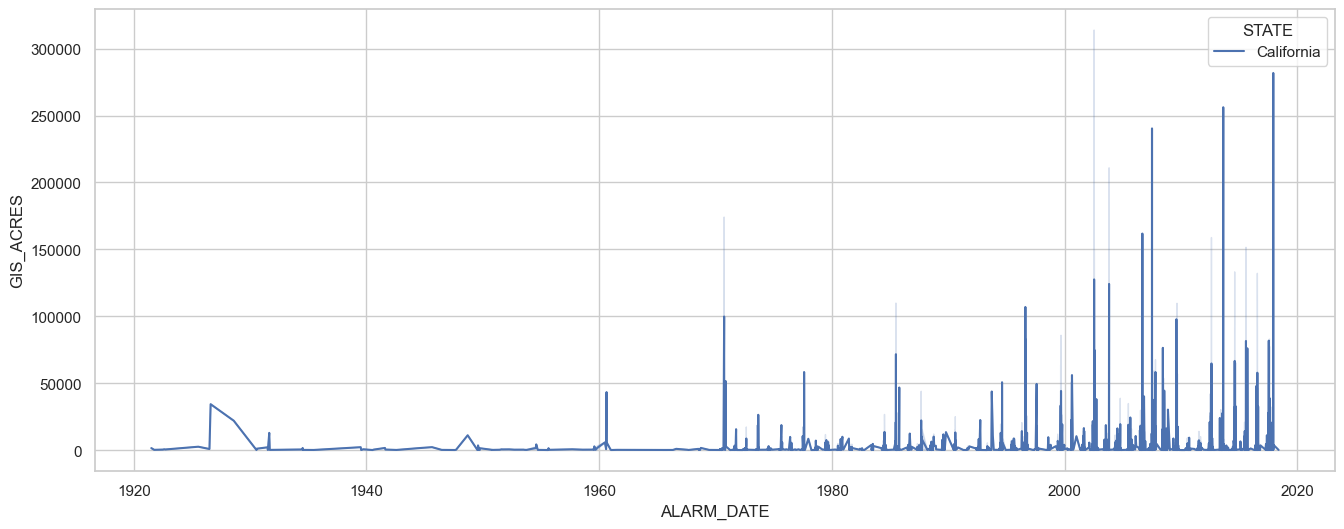

In [63]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="ALARM_DATE", y="GIS_ACRES",hue='STATE', data=df_fires[df_fires['STATE']=='California'])

In [64]:
df_fires['UNIT_ID'].value_counts()

Sequoia National Forest              371
Shasta-Trinity National Forest       249
San Bernardino National Forest       232
Sequoia - Kings Canyon NP            232
Cleveland National Forest            216
                                    ... 
Kern National Wildlife Refuge          2
Rouge River- Siskiyou                  2
US Army Post FD (Hunter Ligget)        1
 Northern California District BLM      1
APV                                    1
Name: UNIT_ID, Length: 104, dtype: int64